# 1. Instal Libraries

In [ ]:
!pip install pyarrow==14.0.1 pandas==1.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 16.5 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.6.0 requires pandas>=1.5.0, but you have pandas 1.3.3 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.3.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.3.3 which is incompatible.
mizani 0.9.3 requires pandas>=1.3.5, but you have pandas 1.3.3 which is i

In [ ]:
!pip install syft torch pandas scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.8/549.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.2/677.2 kB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 58.2 MB/

In [ ]:
# Imports
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset


import numpy as np
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

# Tokenization and Vocabulary Building
from sklearn.feature_extraction.text import CountVectorizer

# 2. Load Datasets

## Dataset 1 - Kaggle 1

In [ ]:
# Step 2.1: Load the Dataset
import pandas as pd

# Assuming the dataset is stored in a CSV file
url = '/content/train_E6oV3lV.csv' #kaggle1
df1 = pd.read_csv(url)
print("Training Set 1 :"% df1.columns, df1.shape)

# Display the first few rows of the dataset
print(df1.head())

# filter
df1 = df1[['label','tweet']]

# Display the first few rows of the dataset
print(df1.head())

## Dataset 2 - Kaggle 2

In [ ]:
# Step 2: Load the Dataset
# Assuming the dataset is stored in a CSV file
url = '/content/toxicity_parsed_dataset.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

   index                                               Text  ed_label_0  \
0      0  This: :One can make an analogy in mathematical...         0.9   
1      1  `  :Clarification for you  (and Zundark's righ...         1.0   
2      2                          Elected or Electoral? JHK         1.0   
3      3  `This is such a fun entry.   Devotchka  I once...         1.0   
4      4  Please relate the ozone hole to increases in c...         0.8   

   ed_label_1  oh_label  
0         0.1         0  
1         0.0         0  
2         0.0         0  
3         0.0         0  
4         0.2         0  


## Dataset 3 - Davidson

In [ ]:
# Step 2.3: Load the Dataset
import pandas as pd

# Assuming the dataset is stored in a CSV file
url = '/content/davidson.csv' #davidson
df3 = pd.read_csv(url)
print("Training Set 3 :"% df3.columns, df3.shape)


# Display the first few rows of the dataset
print(df3.head())

# filter
df3 = df3[['class','tweet']]
df3.rename(columns = {'class':'label','tweet':'tweet'}, inplace = True)

# Filter out offensive language rows
df3 = df3[df3['label'] != 1]

# Map the labels
df3['label'] = df3['label'].map({0: 1, 2: 0})

# Display the first few rows of the dataset
print(df3.head())

## Data Pre-Processing + Split Data

In [ ]:
data = pd.concat([df1,df2,df3], ignore_index = True)
print(data.shape)
data.head()

In [ ]:
# Clean Data:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    return df

data_clean = clean_text(data, "tweet")

In [ ]:
train_clean, test_clean = train_test_split(data_clean, test_size=0.3,random_state=10, shuffle=True)

In [ ]:
# upsampled
train_majority = train_clean[train_clean.label==0]
train_minority = train_clean[train_clean.label==1]
train_minority_upsampled = resample(train_minority,
                                 replace=True,
                                 n_samples=len(train_majority),
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['label'].value_counts()

In [ ]:
print(train_clean.shape)
# train_clean
print(train_upsampled.shape)
# train_upsampled

# 4. Define Model

In [ ]:
# Step 3: Preprocess the Data
# Encode labels
label_encoder = LabelEncoder()
train_upsampled['label'] = label_encoder.fit_transform(train_upsampled['label'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_upsampled['tweet'], train_upsampled['label'], test_size=0.3, random_state=42) # train and validation

# Tokenization and Vocabulary Building
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

# Convert labels to numpy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# Step 4: Define the Model
class HateSpeechDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = torch.tensor(texts, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

class HateSpeechModel(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super(HateSpeechModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = nn.Linear(embed_dim, 1)

    def forward(self, text):
        embedded = self.embedding(text.long())
        return self.fc(embedded)

vocab_size = 5000
embed_dim = 100
model = HateSpeechModel(vocab_size, embed_dim)

# 5. Federated Model

In [ ]:
# Step 5: Simulated Federated Learning Setup
import syft as sy

# Create local workers
num_clients = 5
workers = [f"client{i}" for i in range(num_clients)]

# Split the dataset into parts for each client
client_datasets = [
    HateSpeechDataset(X_train_vec[i::num_clients], y_train[i::num_clients].astype(int)) for i in range(num_clients)
]

# Create DataLoaders for each client
federated_train_loaders = [
    DataLoader(client_datasets[i], batch_size=32, shuffle=True) for i in range(num_clients)
]


In [ ]:
# Step 6: Train the Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Variables to track loss and accuracy
epoch_losses = []
epoch_accuracies = []

# Training loop with progress monitoring
for epoch in range(10):
    model.train()
    total_loss = 0
    batch_count = 0
    for client_loader in federated_train_loaders:
        for texts, labels in client_loader:
            texts, labels = texts.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(texts)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            batch_count += 1
    avg_loss = total_loss / batch_count
    epoch_losses.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')

    # Evaluate the model on test data
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for texts, labels in DataLoader(HateSpeechDataset(X_test_vec, y_test), batch_size=32, shuffle=False):
            texts, labels = texts.to(device), labels.to(device)
            outputs = model(texts)
            preds = torch.round(torch.sigmoid(outputs.squeeze()))
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    epoch_accuracies.append(accuracy)
    print(f'Accuracy: {accuracy}')


Epoch 1, Loss: 0.3179404742801294
Accuracy: 0.9035631536101196
Epoch 2, Loss: 0.31761063959482166
Accuracy: 0.9035631536101196
Epoch 3, Loss: 0.31744151197849435
Accuracy: 0.9035631536101196
Epoch 4, Loss: 0.31727424332398796
Accuracy: 0.9035631536101196
Epoch 5, Loss: 0.31700114741902774
Accuracy: 0.9035631536101196
Epoch 6, Loss: 0.31693555000651913
Accuracy: 0.9035631536101196
Epoch 7, Loss: 0.31688254936802224
Accuracy: 0.9035631536101196
Epoch 8, Loss: 0.3167625699290197
Accuracy: 0.9035631536101196
Epoch 9, Loss: 0.31640649866848924
Accuracy: 0.9035631536101196
Epoch 10, Loss: 0.3164629475382601
Accuracy: 0.9035631536101196


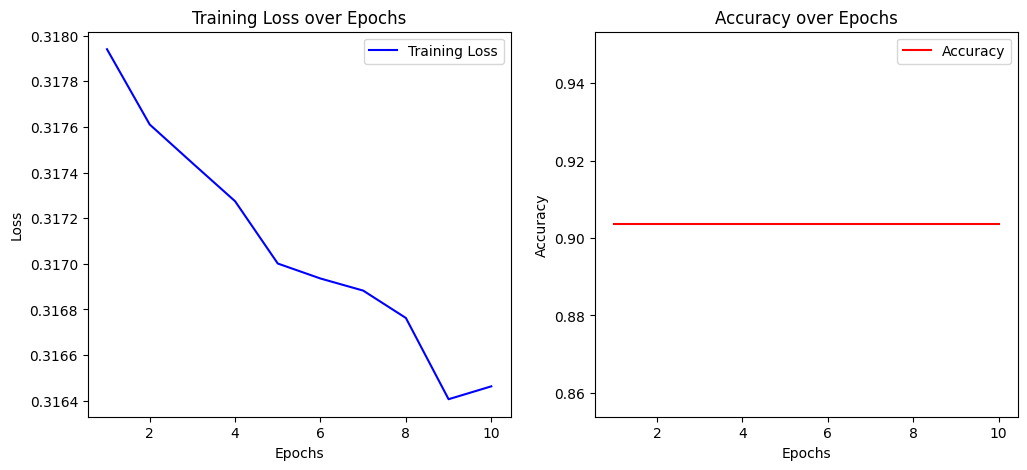

In [ ]:
# Step 7: Plot the Training Loss and Accuracy
epochs = range(1, 11)

# Plot training loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, epoch_losses, 'b', label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, epoch_accuracies, 'r', label='Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()